In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from datetime import date
import scipy.stats as stats
import math


In [2]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [3]:
combined_df =contacts_df.merge(listings_df, left_on ='id_listing_anon', right_on='id_listing_anon')
combined_df2 =combined_df.merge(users_df, left_on ='id_guest_anon', right_on='id_user_anon')
combined_df3 = combined_df2.copy()
combined_df3.ts_booking_at = combined_df3.ts_booking_at.fillna(0)
combined_df3.ts_booking_at = combined_df3.ts_booking_at.apply(lambda x: 0 if x==0 else 1)
combined_df3["m_guests"] = combined_df3["m_guests"].fillna(2)
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)

combined_df3['ts_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'],infer_datetime_format=True)
combined_df3['ds_checkin_first'] = pd.to_datetime(combined_df3['ds_checkin_first'],infer_datetime_format=True)

combined_df3['ds_checkout_first'] = pd.to_datetime(combined_df3['ds_checkout_first'],infer_datetime_format=True)

combined_df3['date_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'].dt.date)
combined_df3['delta_days'] = combined_df3.ds_checkin_first - combined_df3.date_interaction_first
combined_df3['delta_days'] = pd.to_numeric(combined_df3['delta_days'].dt.days, downcast='integer')
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)
d1 =  {
    '-unknown-':'new'}
combined_df3['guest_user_stage_first'].replace(d1, inplace= True)

In [4]:
combined_df3['length_of_stay'] = combined_df3['ds_checkout_first']-combined_df3['ds_checkin_first']
combined_df3['length_of_stay_days'] = combined_df3['length_of_stay'] / np.timedelta64(1, 'D')

In [5]:
combined_df3

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days,length_of_stay,length_of_stay_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103,4 days,4.0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56,14 days,14.0
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177,11 days,11.0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47,9 days,9.0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19,6 days,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,c9a65e4e-861b-44da-912c-e36431b9cc8d,c69fe912-5179-45cc-b717-494400ee8e64,44599aa4-b4b1-48b3-8935-b5ae4b8776fb,2016-04-15 01:28:13,2016-04-15 01:28:13.0,2016-04-15 01:28:13.0,1,2016-08-13,2016-08-16,4.0,...,-unknown-,0.0,c9a65e4e-861b-44da-912c-e36431b9cc8d,CA,0,True,2016-04-15,120,3 days,3.0
27975,093c954f-3664-4061-8d34-dbabccacec2d,c8a72e96-90c2-4712-a70a-9045b6aaaac4,e8eeca2e-94d2-41bd-8f46-cebe760df6de,2016-05-28 18:22:19,2016-05-29 02:08:14.0,NaN,0,2016-08-01,2016-08-31,5.0,...,Barra da Tijuca,0.0,093c954f-3664-4061-8d34-dbabccacec2d,CL,5,False,2016-05-28,65,30 days,30.0
27976,d2f7ebd4-5c4c-43c6-8d44-ac1cf35dc239,78ae0e1c-cda3-492b-b04c-b03ead4fd3d9,50857a02-3603-458e-8c35-01d3dc207bb3,2016-01-15 21:58:02,2016-01-16 00:31:49.0,NaN,0,2016-02-05,2016-02-09,3.0,...,Barra da Tijuca,1.0,d2f7ebd4-5c4c-43c6-8d44-ac1cf35dc239,BR,0,False,2016-01-15,21,4 days,4.0
27977,9c258146-9db6-4133-b4ee-9e2c16d65b57,02877f4f-2ad9-4ce1-b896-18d49bfbbc5f,363308ad-a601-4f8b-b482-82e8659c2069,2016-05-21 13:03:42,2016-05-21 13:03:43.0,2016-05-21 13:03:43.0,1,2016-07-30,2016-08-27,4.0,...,Ipanema,0.0,9c258146-9db6-4133-b4ee-9e2c16d65b57,GB,12,True,2016-05-21,70,28 days,28.0


In [6]:
combined_df3['ts_reply_at_first'] = pd.to_datetime(combined_df3['ts_reply_at_first'],infer_datetime_format=True)
combined_df3['response_time'] = combined_df3['ts_reply_at_first']-combined_df3['ts_interaction_first']
combined_df3['response_time_hours'] = combined_df3['response_time'] / np.timedelta64(1, 'h')

In [7]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   id_guest_anon                         27979 non-null  object         
 1   id_host_anon                          27979 non-null  object         
 2   id_listing_anon                       27979 non-null  object         
 3   ts_interaction_first                  27979 non-null  datetime64[ns] 
 4   ts_reply_at_first                     25935 non-null  datetime64[ns] 
 5   ts_accepted_at_first                  16454 non-null  object         
 6   ts_booking_at                         27979 non-null  int64          
 7   ds_checkin_first                      27979 non-null  datetime64[ns] 
 8   ds_checkout_first                     27979 non-null  datetime64[ns] 
 9   m_guests                              27979 non-null  float64

In [8]:
contact_me_df3= combined_df3[combined_df3['contact_channel_first']=='contact_me']
instant_book_df3= combined_df3[combined_df3['contact_channel_first']=='instant_book']
book_it_df3= combined_df3[combined_df3['contact_channel_first']=='book_it']

In [9]:
kde_data_contact_me = contact_me_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]
kde_data_instant_book_df3 = instant_book_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]
kde_data_book_it_df3 = book_it_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors Book it type')

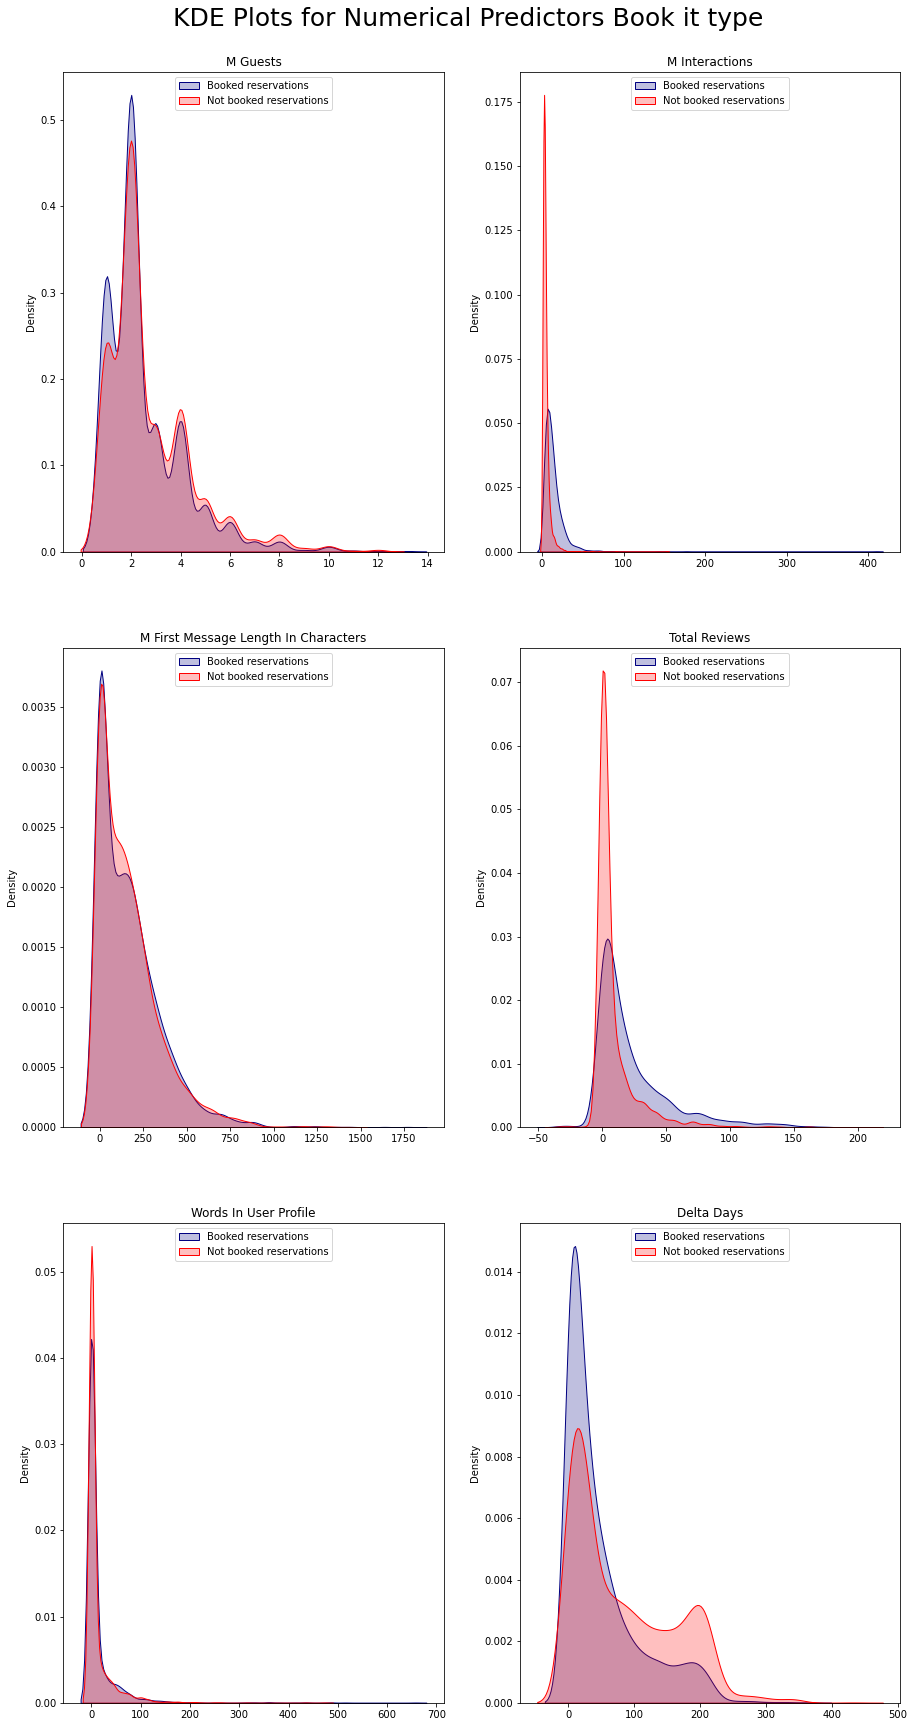

In [10]:
kde_cols = kde_data_book_it_df3.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_book_it_df3[kde_data_book_it_df3.ts_booking_at == 1]
    unbooked = kde_data_book_it_df3[kde_data_book_it_df3.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors Book it type",y=0.91, fontsize=25)

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors Contact Me Type')

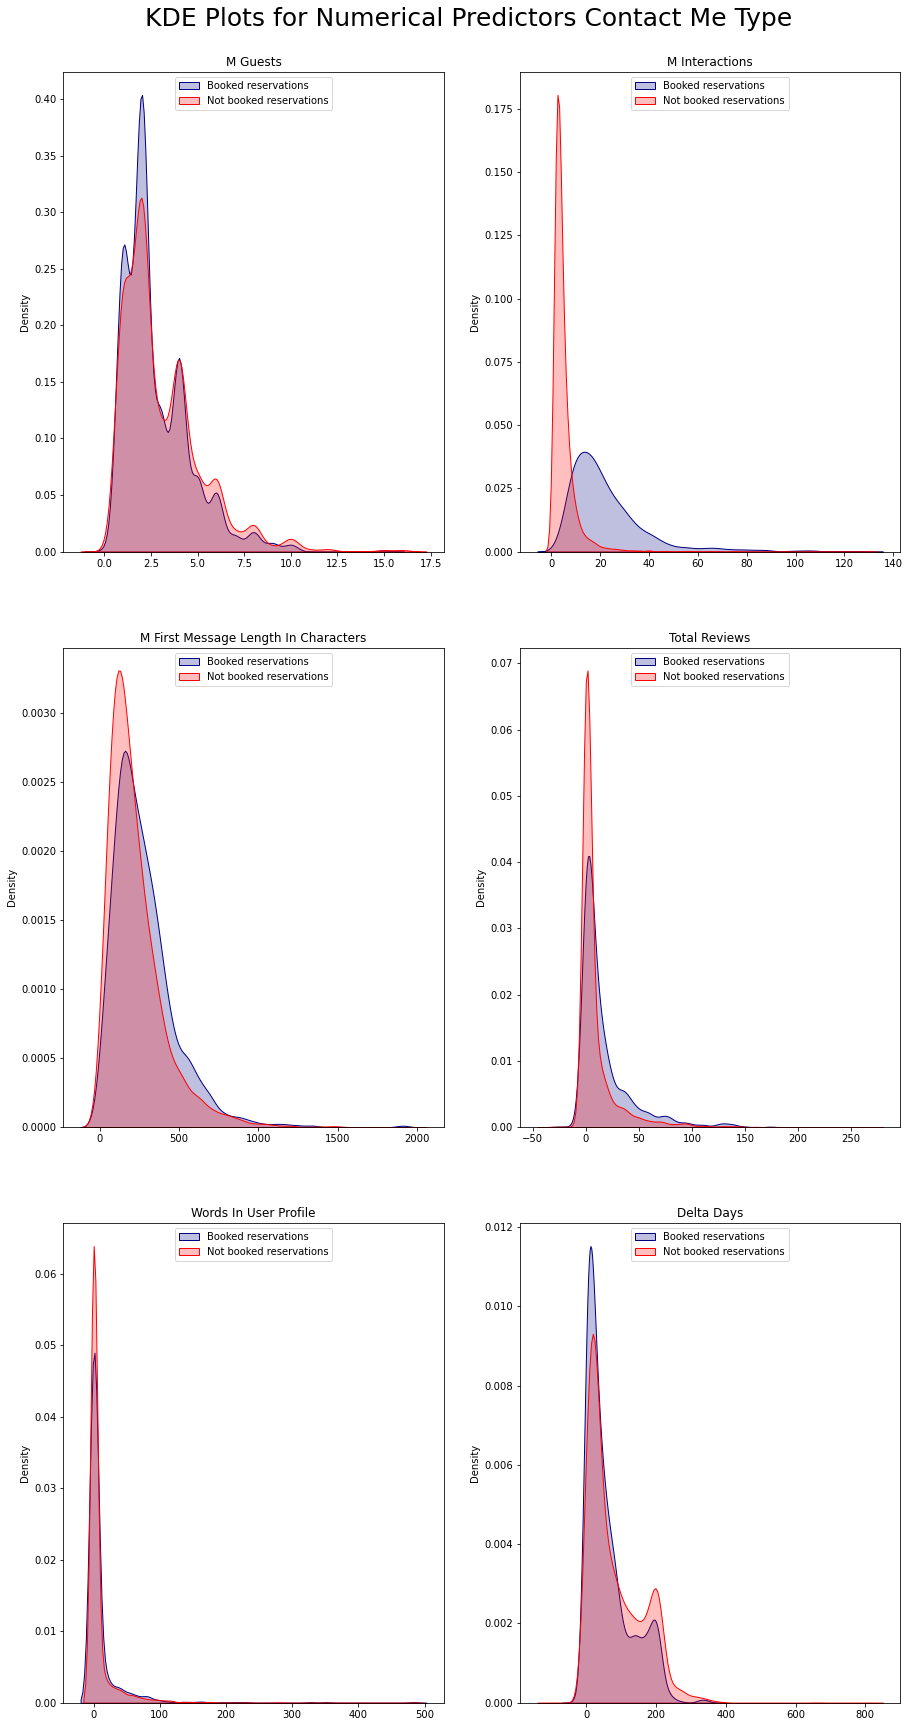

In [11]:
kde_cols = kde_data_contact_me.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_contact_me[kde_data_contact_me.ts_booking_at == 1]
    unbooked = kde_data_contact_me[kde_data_contact_me.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors Contact Me Type",y=0.91, fontsize=25)

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors Instant Book Type')

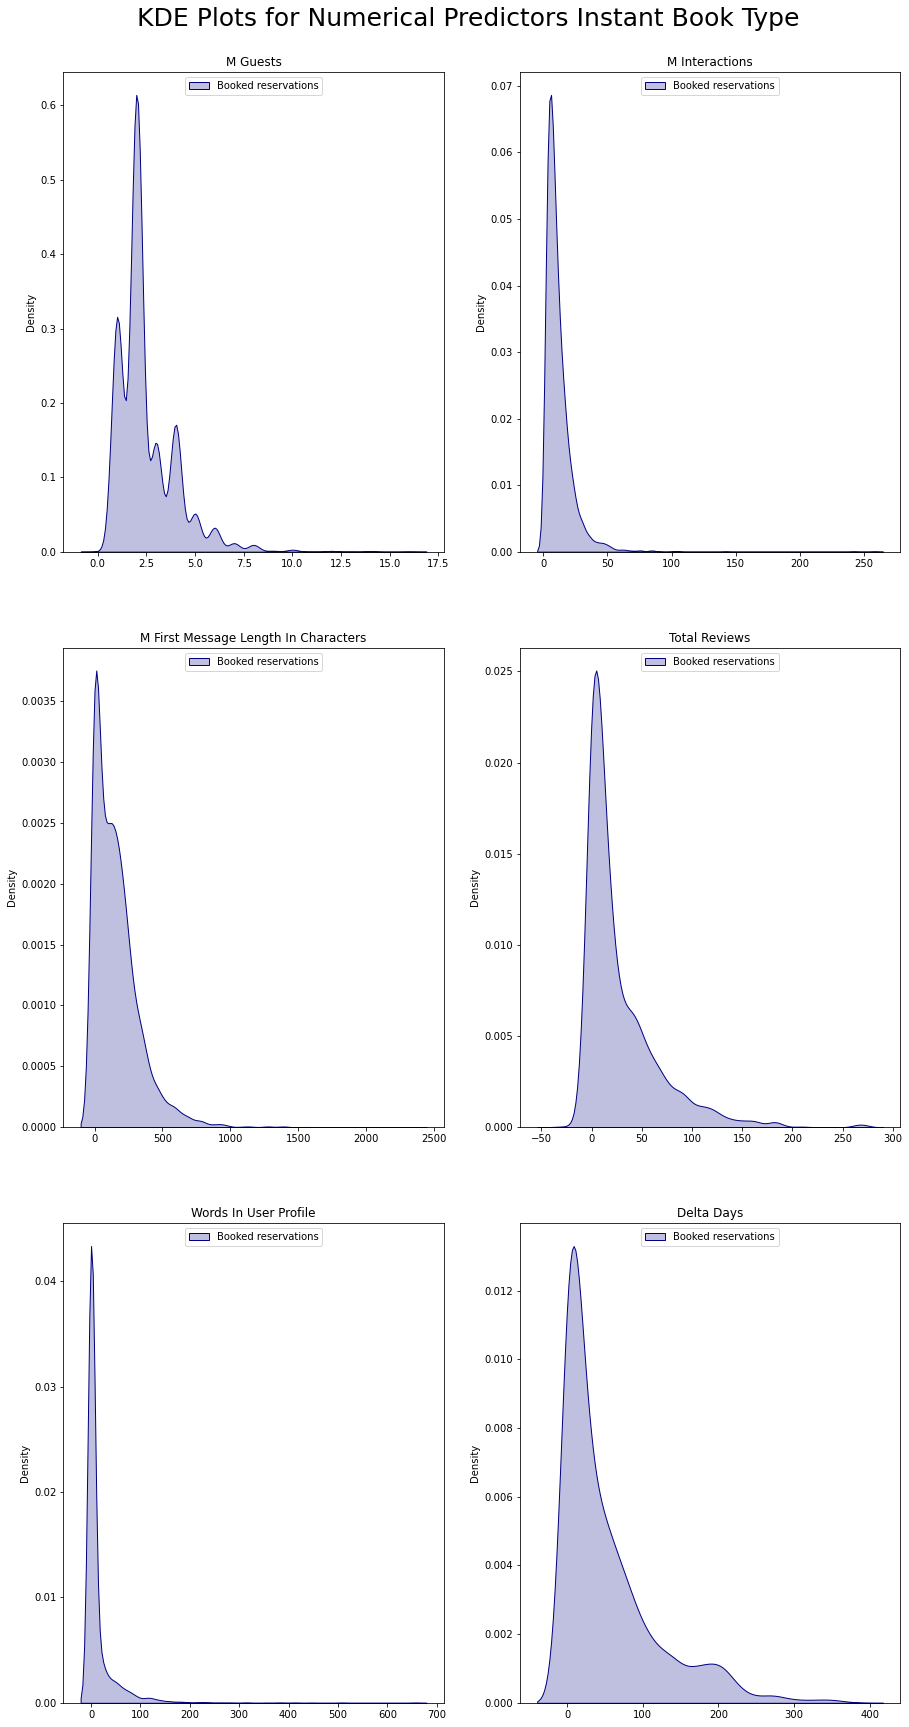

In [12]:
kde_cols = kde_data_instant_book_df3.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_instant_book_df3[kde_data_instant_book_df3.ts_booking_at == 1]
    unbooked = kde_data_instant_book_df3[kde_data_instant_book_df3.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors Instant Book Type",y=0.91, fontsize=25)

In [13]:
cat_data_contact_me_df3 = contact_me_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols_contact_me_df3 = cat_data_contact_me_df3.iloc[:,:4].columns.to_list()

In [14]:
cat_data_book_it = book_it_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols_book_it = cat_data_book_it.iloc[:,:4].columns.to_list()

cat_data_instant_book = instant_book_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols_instant_book = cat_data_instant_book.iloc[:,:4].columns.to_list()

Text(0.5, 0.91, 'Stacked Barcharts for Categorical Predictors Contact Me Type')

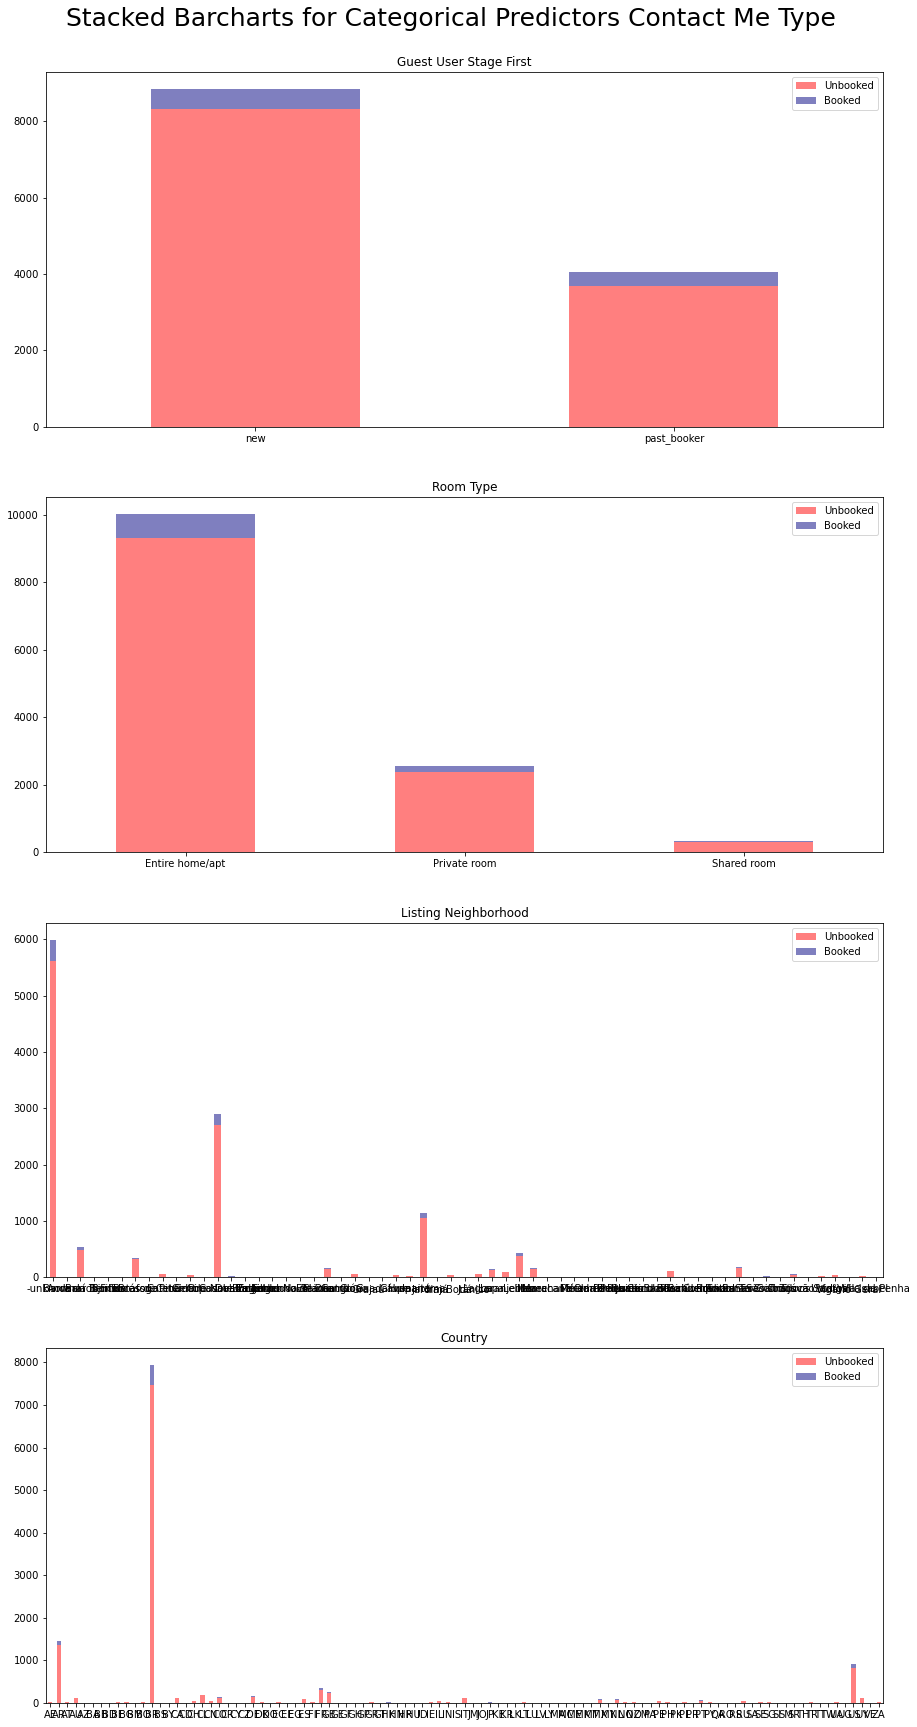

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

# date_format = mdates.DateFormatter('%B-%d')

for col, ax in zip(cat_cols_contact_me_df3[:4], axs.flatten()):
    group_data = cat_data_contact_me_df3.groupby([col,'booked']).size().unstack()
    group_data.columns = ['Unbooked', 'Booked']
    group_data.plot.bar(stacked=True, ax=ax, color=['#FF0000','#000080' ], alpha = 0.5)
    if col == 'signup_date':
        ax.xaxis.set_major_formatter(date_format)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
    else:
        ax.tick_params(labelrotation=0)
    ax.set_xlabel("")
    ax.set_title(col.replace('_', ' ').title())
    _ = ax.legend(loc='best')

plt.suptitle("Stacked Barcharts for Categorical Predictors Contact Me Type",y=0.91, fontsize=25) 

Text(0.5, 0.91, 'Stacked Barcharts for Categorical Predictors Book-it Type')

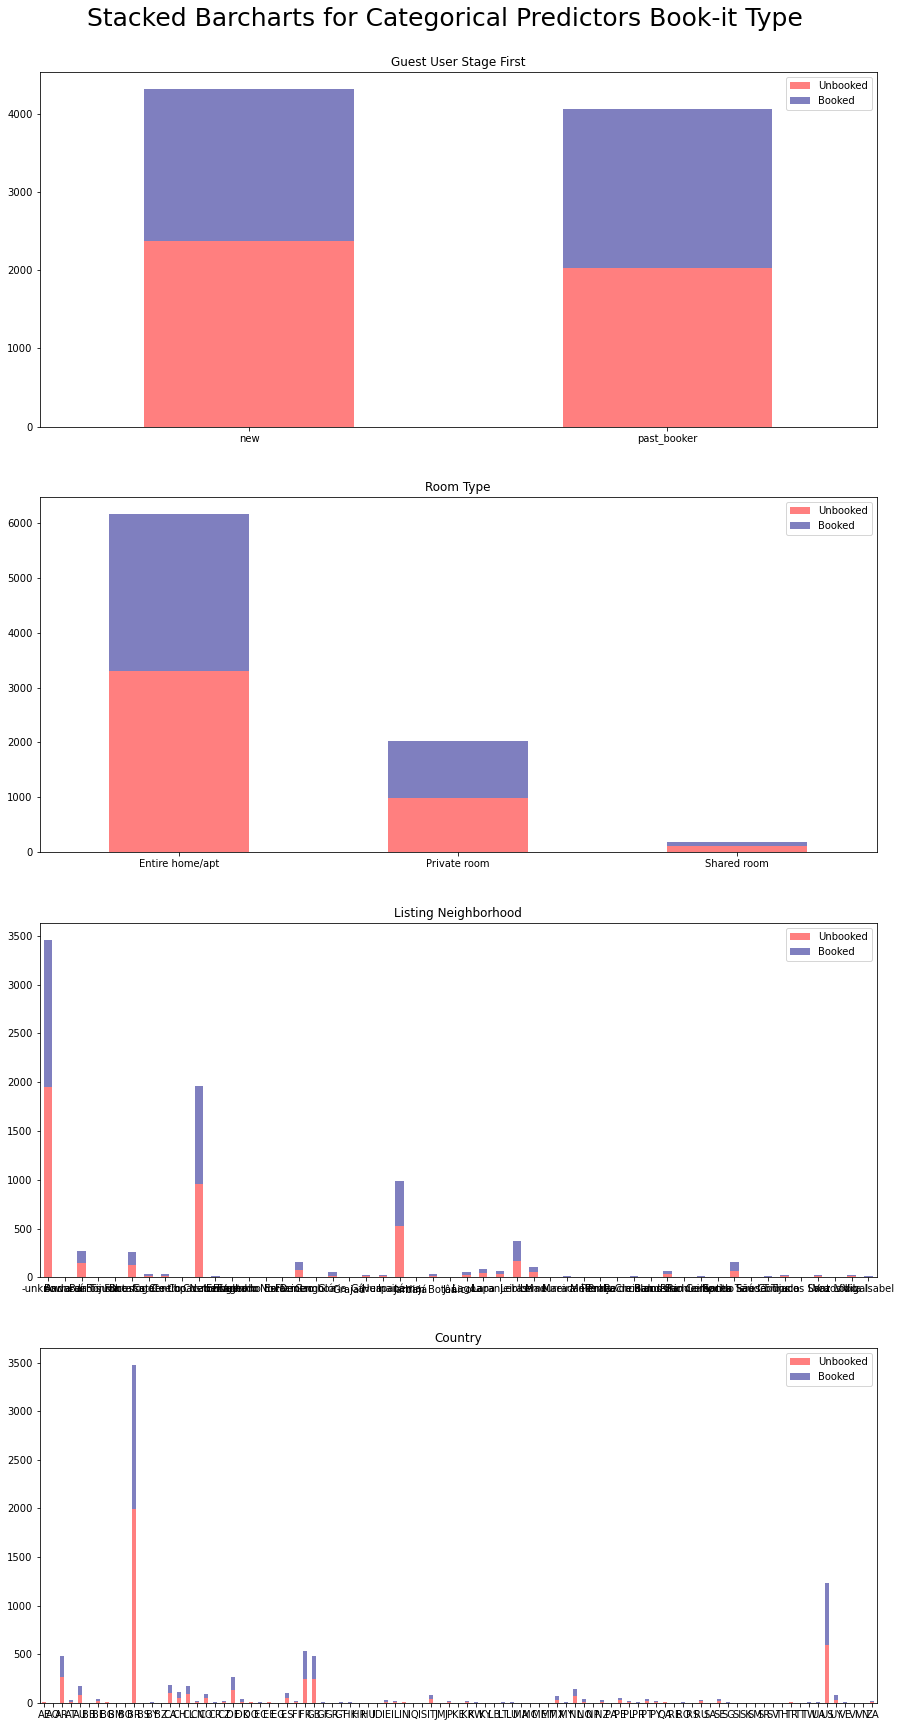

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

# date_format = mdates.DateFormatter('%B-%d')

for col, ax in zip(cat_cols_book_it[:4], axs.flatten()):
    group_data = cat_data_book_it.groupby([col,'booked']).size().unstack()
    group_data.columns = ['Unbooked', 'Booked']
    group_data.plot.bar(stacked=True, ax=ax, color=['#FF0000','#000080' ], alpha = 0.5)
    if col == 'signup_date':
        ax.xaxis.set_major_formatter(date_format)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
    else:
        ax.tick_params(labelrotation=0)
    ax.set_xlabel("")
    ax.set_title(col.replace('_', ' ').title())
    _ = ax.legend(loc='best')

plt.suptitle("Stacked Barcharts for Categorical Predictors Book-it Type",y=0.91, fontsize=25) 

In [17]:
contact_me_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days,length_of_stay,length_of_stay_days,response_time,response_time_hours
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56,14 days,14.0,-1 days +23:58:50,-0.019444
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaN,0,2016-08-11,2016-08-22,5.0,...,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177,11 days,11.0,0 days 01:23:35,1.393056
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaN,0,2016-03-14,2016-03-23,1.0,...,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47,9 days,9.0,0 days 02:39:09,2.652500
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaN,0,2016-06-11,2016-06-17,1.0,...,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19,6 days,6.0,0 days 00:34:26,0.573889
7,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-03-21 22:32:01,2016-03-21 22:39:02,2016-03-21 22:40:26.0,0,2016-03-25,2016-03-27,2.0,...,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,ES,1,False,2016-03-21,4,2 days,2.0,0 days 00:07:01,0.116944


In [18]:
contact_me_df3.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first', 'room_type',
       'listing_neighborhood', 'total_reviews', 'id_user_anon', 'country',
       'words_in_user_profile', 'booked', 'date_interaction_first',
       'delta_days', 'length_of_stay', 'length_of_stay_days', 'response_time',
       'response_time_hours'],
      dtype='object')

In [19]:
contact_me_df3.m_interactions.describe()

count    12891.000000
mean         6.099992
std          8.233247
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max        130.000000
Name: m_interactions, dtype: float64

In [20]:
contact_me_df3[contact_me_df3.ts_booking_at ==1].describe()

,ts_booking_at,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,words_in_user_profile,delta_days,length_of_stay,length_of_stay_days,response_time,response_time_hours
count,911.0,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911,911.000000,911,911.000000
mean,1.0,2.778266,22.513721,276.338090,16.672887,9.983535,62.122942,7 days 03:12:50.581778265,7.133919,0 days 04:34:56.681668496,4.582412
std,0.0,1.819676,16.417077,198.345303,25.497652,32.979893,64.886429,8 days 19:23:26.218116999,8.807942,0 days 09:19:33.001385527,9.325834
min,1.0,0.000000,4.000000,0.000000,-27.000000,0.000000,-31.000000,1 days 00:00:00,1.000000,-1 days +23:58:50,-0.019444
25%,1.0,2.000000,12.000000,140.500000,1.000000,0.000000,12.000000,3 days 00:00:00,3.000000,0 days 00:10:45,0.179167
50%,1.0,2.000000,18.000000,237.000000,6.000000,0.000000,38.000000,5 days 00:00:00,5.000000,0 days 00:56:54,0.948333
75%,1.0,4.000000,28.000000,359.500000,20.000000,1.000000,88.500000,8 days 00:00:00,8.000000,0 days 05:07:24.500000,5.123472
max,1.0,15.000000,126.000000,1909.000000,174.000000,483.000000,346.000000,92 days 00:00:00,92.000000,4 days 06:44:42,102.745000


In [21]:
contact_me_df3[contact_me_df3.ts_booking_at ==0].describe()

,ts_booking_at,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,words_in_user_profile,delta_days,length_of_stay,length_of_stay_days,response_time,response_time_hours
count,11980.0,11980.000000,11980.000000,11980.000000,11980.000000,11980.000000,11980.000000,11980,11980.000000,10801,10801.000000
mean,0.0,3.071870,4.851836,226.924791,8.908598,7.896160,81.881720,10 days 01:54:33.055091819,10.079549,1 days 00:40:47.874548652,24.679965
std,0.0,2.133125,5.515469,183.628160,19.956282,25.876112,77.375337,20 days 04:48:44.637270023,20.200517,7 days 06:25:11.553834070,174.419876
min,0.0,0.000000,1.000000,0.000000,-34.000000,0.000000,-94.000000,1 days 00:00:00,1.000000,-1 days +23:58:50,-0.019444
25%,0.0,2.000000,2.000000,106.000000,0.000000,0.000000,21.000000,3 days 00:00:00,3.000000,0 days 00:23:30,0.391667
50%,0.0,2.000000,3.000000,179.000000,1.000000,0.000000,52.000000,5 days 00:00:00,5.000000,0 days 02:55:00,2.916667
75%,0.0,4.000000,5.000000,295.000000,7.000000,1.000000,137.000000,9 days 00:00:00,9.000000,0 days 11:59:59,11.999722
max,0.0,16.000000,130.000000,1948.000000,268.000000,482.000000,804.000000,365 days 00:00:00,365.000000,243 days 22:58:31,5854.975278


In [22]:
booked_contact_series = contact_me_df3[contact_me_df3.ts_booking_at ==1]
unbooked_contact_series = contact_me_df3[contact_me_df3.ts_booking_at ==0]


np_booked_contact = booked_contact_series.m_interactions.to_numpy()
np_unbooked_contact= unbooked_contact_series.m_interactions.to_numpy()

# booked = kde_data_book_it_df3[kde_data_book_it_df3.ts_booking_at == 1]

In [23]:
type(np_booked_contact)
# np_booked_contact

numpy.ndarray

In [24]:
np_booked_contact.mean()

22.513721185510427

In [25]:
booked_contact_series.m_interactions

90       10
92       16
211      47
260       8
267      34
         ..
27894     8
27914    31
27938    29
27948    16
27957    23
Name: m_interactions, Length: 911, dtype: int64

In [26]:
type(booked_contact_series.m_interactions)

pandas.core.series.Series

In [27]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [28]:
type(wisconsin_ages)

numpy.ndarray

In [29]:
stats.ttest_ind(a= np_booked_contact,
                b= np_unbooked_contact,
                equal_var=False)

Ttest_indResult(statistic=32.33289546818883, pvalue=4.265264047795992e-154)

In [30]:
np_booked_contact.mean()

22.513721185510427

In [31]:
np_unbooked_contact.mean()

4.851836393989983

In [32]:
import statsmodels.api as sm
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary


def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()

In [33]:
contact_me_df4 = contact_me_df3.copy()
contact_me_df4

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days,length_of_stay,length_of_stay_days,response_time,response_time_hours
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56,14 days,14.0,-1 days +23:58:50,-0.019444
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaN,0,2016-08-11,2016-08-22,5.0,...,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177,11 days,11.0,0 days 01:23:35,1.393056
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaN,0,2016-03-14,2016-03-23,1.0,...,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47,9 days,9.0,0 days 02:39:09,2.652500
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaN,0,2016-06-11,2016-06-17,1.0,...,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19,6 days,6.0,0 days 00:34:26,0.573889
7,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-03-21 22:32:01,2016-03-21 22:39:02,2016-03-21 22:40:26.0,0,2016-03-25,2016-03-27,2.0,...,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,ES,1,False,2016-03-21,4,2 days,2.0,0 days 00:07:01,0.116944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27970,6b5ae684-b4ca-4a71-9304-b73d2d0be506,83861e28-ddc3-451b-a230-b20761238e1a,1044406a-0ed0-4980-b0d8-de01cd6bddf0,2016-06-27 17:28:30,NaT,NaN,0,2016-08-12,2016-08-16,2.0,...,6b5ae684-b4ca-4a71-9304-b73d2d0be506,BR,0,False,2016-06-27,46,4 days,4.0,NaT,NaN
27971,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,131376ad-5a29-418d-8a2b-2fa85220351b,7b24adac-db11-4166-8a9b-ab479557d467,2016-01-23 17:13:32,2016-01-24 02:05:06,NaN,0,2016-02-06,2016-02-10,3.0,...,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,BR,0,False,2016-01-23,14,4 days,4.0,0 days 08:51:34,8.859444
27973,fba4fb6b-21c2-4e3c-8537-f96923c1b030,966dd82d-8e18-4c1e-87df-bf7337d5dfd6,3c9a9045-6309-4fe6-8ac3-5d67fe200d0e,2016-02-26 06:55:53,2016-02-26 11:27:57,2016-02-26 11:27:57.0,0,2016-03-19,2016-03-29,1.0,...,fba4fb6b-21c2-4e3c-8537-f96923c1b030,US,0,False,2016-02-26,22,10 days,10.0,0 days 04:32:04,4.534444
27975,093c954f-3664-4061-8d34-dbabccacec2d,c8a72e96-90c2-4712-a70a-9045b6aaaac4,e8eeca2e-94d2-41bd-8f46-cebe760df6de,2016-05-28 18:22:19,2016-05-29 02:08:14,NaN,0,2016-08-01,2016-08-31,5.0,...,093c954f-3664-4061-8d34-dbabccacec2d,CL,5,False,2016-05-28,65,30 days,30.0,0 days 07:45:55,7.765278


In [34]:
# summary_model(X, y, label='scatter')
contact_me_df4.shape

(12891, 27)

In [35]:
col_list = ['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first','ds_checkin_first', 'ds_checkout_first','id_user_anon',
            'country','booked', 'date_interaction_first','listing_neighborhood','guest_user_stage_first', 'room_type','contact_channel_first']

In [36]:
contact_me_df5 =contact_me_df4.drop(col_list, axis = 1,inplace= True)

In [37]:
contact_me_df5.drop(['contact_channel_first', 'guest_user_stage_first'], axis = 1,inplace= True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
contact_me_df4

In [40]:
y = contact_me_df4.pop('ts_booking_at')
X= contact_me_df4

KeyError: 'ts_booking_at'

In [39]:
summary_model(X, y, label='scatter')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [69]:
combined_df3.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first', 'room_type',
       'listing_neighborhood', 'total_reviews', 'id_user_anon', 'country',
       'words_in_user_profile', 'booked', 'date_interaction_first',
       'delta_days', 'length_of_stay', 'length_of_stay_days', 'response_time',
       'response_time_hours'],
      dtype='object')

In [72]:
combined_df3.id_host_anon.value_counts().plot.bar()

<AxesSubplot:>

Error in callback <function flush_figures at 0x120dcfcb0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:ylabel='id_host_anon'>

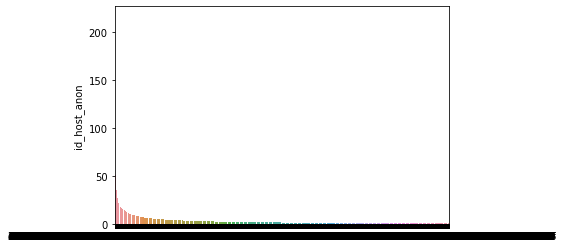

In [73]:
sbn.barplot(x=combined_df3.id_host_anon.value_counts().index, y=combined_df3.id_host_anon.value_counts())